# 📊 U.S. Chronic Disease Indicators Analysis

##Introduction
This project analyzes data from the U.S. Chronic Disease Indicators dataset with a focus on alcohol-related metrics among **females in 2022**, using the **Behavioral Risk Factor Surveillance System (BRFSS)** data source.
## Objective:
The goal is to explore trends, missing data, and key statistics to understand how alcohol use is reported among different states and demographics.


In [20]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
#load dataset
df = pd.read_csv(r'C:\Users\pc\Downloads\U.S._Chronic_Disease_Indicators.csv')
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,NaN,%,Crude Prevalence,...,SLEP,SLP02,NaN,CRDPREV,GRADE,GRD12,NaN,NaN,NaN,NaN
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying ...",NaN,Number,Number,...,AST,AST01,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,NaN,%,Crude Prevalence,...,AST,AST02,NaN,CRDPREV,AGE,AGE1844,NaN,NaN,NaN,NaN


## Data Filtering

In [22]:
#Filter dataset for Alcohol topic, 2022, BRFSS source, Female
alcohol_females_2022=df[
(df['DataSource']=='BRFSS') & 
(df['Topic']=='Alcohol') & 
(df['YearStart']==2022) &
(df['Stratification1']=='Female')]
alcohol_females_2022.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
184090,2022,2022,GU,Guam,BRFSS,Alcohol,Binge drinking prevalence among adults,NaN,%,Crude Prevalence,...,ALC,ALC06,NaN,CRDPREV,SEX,SEXF,NaN,NaN,NaN,NaN
260818,2022,2022,AZ,Arizona,BRFSS,Alcohol,Binge drinking intensity among adults who bing...,NaN,Number,Crude 75th percentile,...,ALC,ALC05,NaN,CRD75TH,SEX,SEXF,NaN,NaN,NaN,NaN
260975,2022,2022,FL,Florida,BRFSS,Alcohol,Binge drinking intensity among adults who bing...,NaN,Number,Crude 75th percentile,...,ALC,ALC05,NaN,CRD75TH,SEX,SEXF,NaN,NaN,NaN,NaN
261975,2022,2022,FL,Florida,BRFSS,Alcohol,Binge drinking frequency among adults who bing...,NaN,Number,Crude 75th percentile,...,ALC,ALC04,NaN,CRD75TH,SEX,SEXF,NaN,NaN,NaN,NaN
262098,2022,2022,CT,Connecticut,BRFSS,Alcohol,Binge drinking intensity among adults who bing...,NaN,Number,Crude Median,...,ALC,ALC05,NaN,CRDMEDN,SEX,SEXF,NaN,NaN,NaN,NaN


In [23]:
#Data overview
alcohol_females_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, 184090 to 309057
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  330 non-null    int64  
 1   YearEnd                    330 non-null    int64  
 2   LocationAbbr               330 non-null    object 
 3   LocationDesc               330 non-null    object 
 4   DataSource                 330 non-null    object 
 5   Topic                      330 non-null    object 
 6   Question                   330 non-null    object 
 7   Response                   0 non-null      float64
 8   DataValueUnit              330 non-null    object 
 9   DataValueType              330 non-null    object 
 10  DataValue                  326 non-null    float64
 11  DataValueAlt               326 non-null    float64
 12  DataValueFootnoteSymbol    4 non-null      object 
 13  DataValueFootnote          4 non-null      obje

In [24]:
#data null checks
alcohol_females_2022.isnull().sum()

YearStart                      0
YearEnd                        0
LocationAbbr                   0
LocationDesc                   0
DataSource                     0
Topic                          0
Question                       0
Response                     330
DataValueUnit                  0
DataValueType                  0
DataValue                      4
DataValueAlt                   4
DataValueFootnoteSymbol      326
DataValueFootnote            326
LowConfidenceLimit             4
HighConfidenceLimit            4
StratificationCategory1        0
Stratification1                0
StratificationCategory2      330
Stratification2              330
StratificationCategory3      330
Stratification3              330
Geolocation                    6
LocationID                     0
TopicID                        0
QuestionID                     0
ResponseID                   330
DataValueTypeID                0
StratificationCategoryID1      0
StratificationID1              0
Stratifica

In [25]:
#loading only the essential columns
alcohol_females_2022=alcohol_females_2022[['YearStart', 'LocationDesc', 'Topic', 'Question', 'DataValueType', 'DataValue','Stratification1']]
alcohol_females_2022.head()

,YearStart,LocationDesc,Topic,Question,DataValueType,DataValue,Stratification1
184090,2022,Guam,Alcohol,Binge drinking prevalence among adults,Crude Prevalence,11.2,Female
260818,2022,Arizona,Alcohol,Binge drinking intensity among adults who bing...,Crude 75th percentile,6.6,Female
260975,2022,Florida,Alcohol,Binge drinking intensity among adults who bing...,Crude 75th percentile,5.9,Female
261975,2022,Florida,Alcohol,Binge drinking frequency among adults who bing...,Crude 75th percentile,3.8,Female
262098,2022,Connecticut,Alcohol,Binge drinking intensity among adults who bing...,Crude Median,4.2,Female


In [26]:
#drop rows with missing values in key columns
alcohol_females_2022.dropna(subset=['DataValue'], inplace=True)

In [27]:
#statistical describing of datavalue column
alcohol_females_2022['DataValue'].describe()

count    326.000000
mean       7.110736
std        4.910645
min        1.100000
25%        3.600000
50%        5.250000
75%       11.600000
max       24.300000
Name: DataValue, dtype: float64

In [18]:
# the 5 largest states in prevalence
top_states=alcohol_females_2022.groupby('LocationDesc')['DataValue'].mean().nlargest(5)
top_states.head()

LocationDesc
District of Columbia    10.100000
Montana                  8.883333
North Dakota             8.550000
Minnesota                8.216667
Wisconsin                8.166667
Name: DataValue, dtype: float64

## Data Visualization

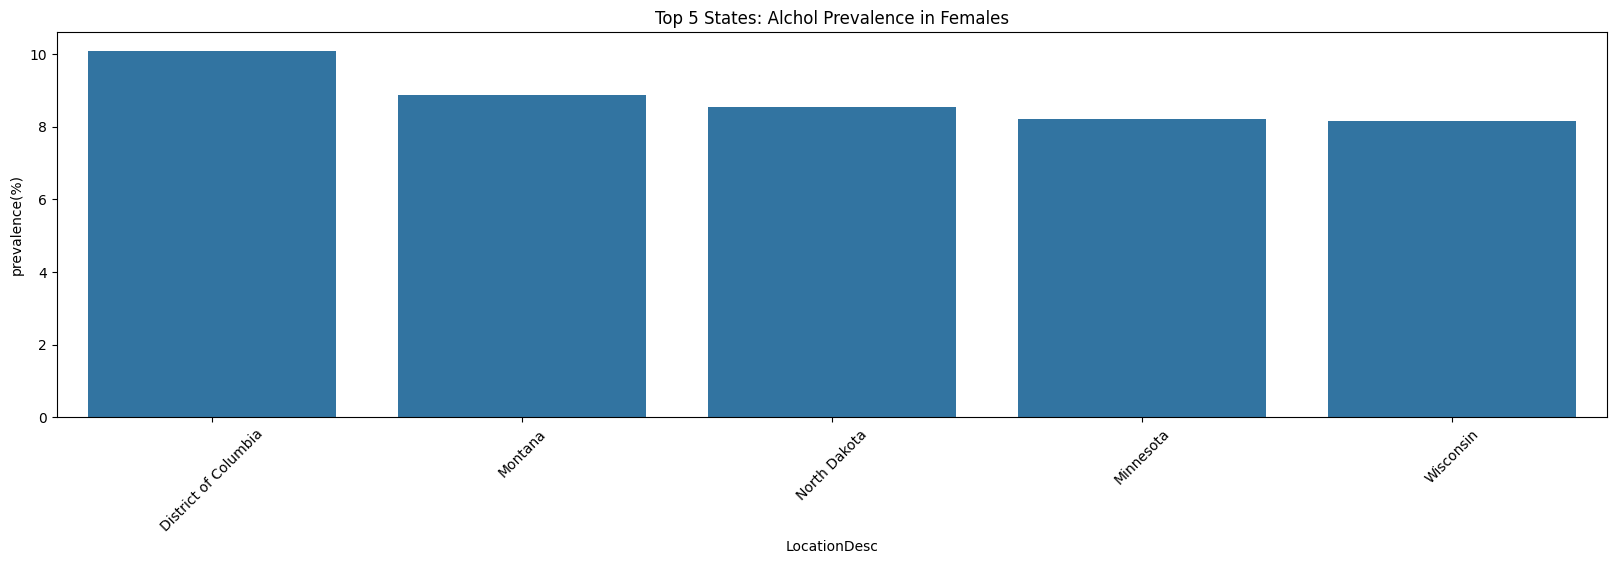

In [28]:
# viaulaization of the top 5 states in prevalence
plt.figure(figsize=(20,5))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title("Top 5 States: Alchol Prevalence in Females")
plt.ylabel("prevalence(%)")
plt.xticks(rotation=45)
plt.show()

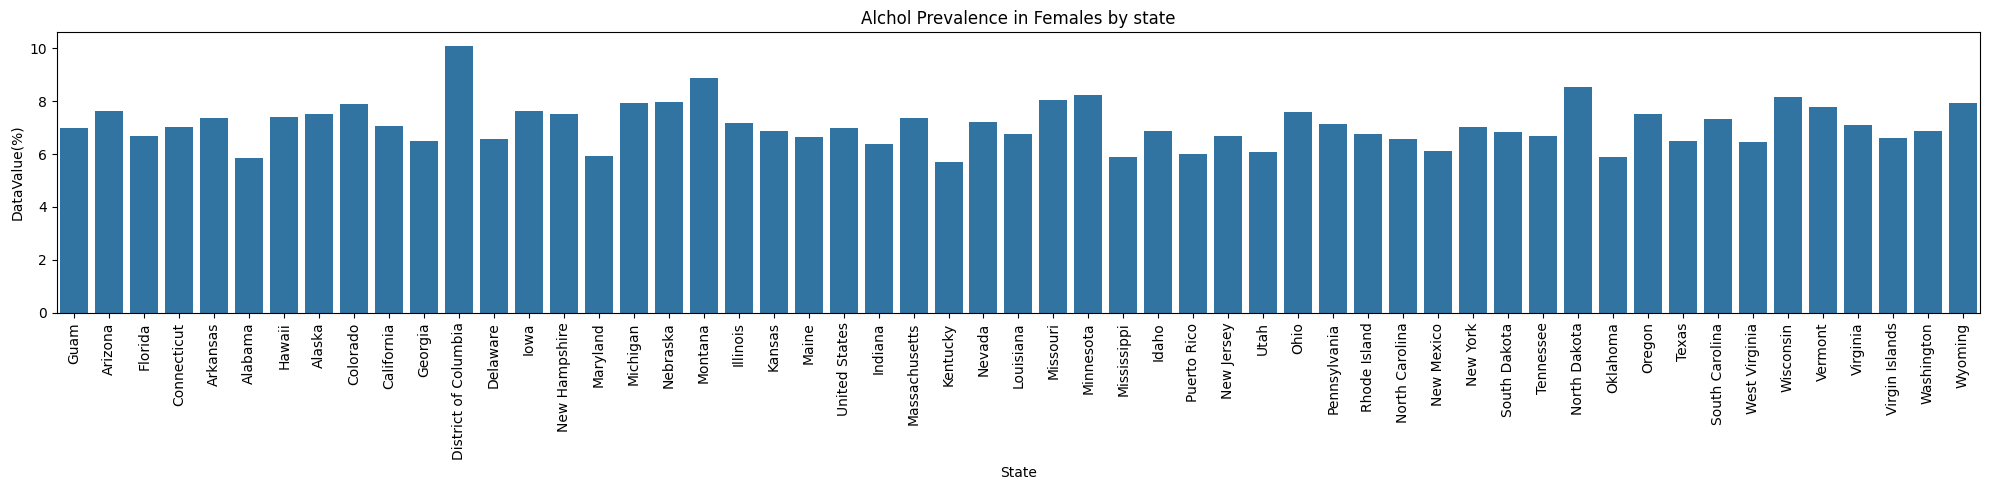

In [29]:
#Average alcohol use reported by state
plt.figure(figsize=(20,5))
sns.barplot(x='LocationDesc', y='DataValue', data=alcohol_females_2022,errorbar=None)
plt.title("Alchol Prevalence in Females by state")
plt.xticks(rotation=90)
plt.ylabel('DataValue(%)')
plt.xlabel('State')
plt.tight_layout()
plt.show()

## 📝 Conclusion

- The BRFSS dataset provides a comprehensive overview of alcohol use across U.S. states.
- In 2022, we observed variability in alcohol usage rates among females.
- I found that the top 5 states in alchol prevalence wasDistrict of Columbia, Montana, North Dakota, Minnesota, Wisconsin with average prevalence rate 10.100000, 8.883333, 8.550000, 8.216667, 8.166667 respectively.
